In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

from detect import get_detections

detections = get_detections()
boxes = detections["boxes"]
logits = detections["logits"]
image_path = detections["image"]


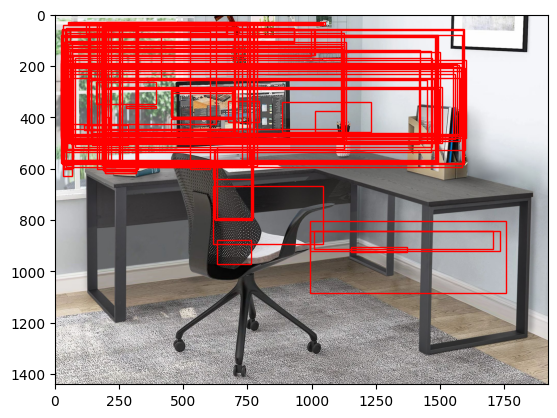

In [24]:
fig, ax = plt.subplots(1)
image = plt.imread(image_path)

ax.imshow(image)

image_height, image_width = image.shape[:2]

for box in boxes:
    xmin = int(box[0] * image_width)
    ymin = int(box[1] * image_height)
    xmax = int(box[2] * image_width)
    ymax = int(box[3] * image_height)

    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor="r", facecolor="none")
    ax.add_patch(rect)


plt.show()

In [ ]:
# Just draw boxes without the image background
